In [1]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [55]:
import tweepy
import pandas as pd
from wordcloud import WordCloud
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

In [3]:
# Load the data
import pandas as pd
tweets = pd.read_csv('amazon_vfl_reviews.csv')
tweets=tweets.head(500)
tweets


,asin,name,date,rating,review
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...
...,...,...,...,...,...
495,B00ISNVQMW,Titan-Octane-Analog-Silver-Watch-NK1650BM03,2019-09-30,5,"After HMT, titan is first choice for all young..."
496,B00ISNVQMW,Titan-Octane-Analog-Silver-Watch-NK1650BM03,2019-10-30,5,Premium and genuine product at this price poin...
497,B00ISNVQMW,Titan-Octane-Analog-Silver-Watch-NK1650BM03,2019-10-28,5,Its nice. I purchase for my sister to give as ...
498,B00ISNVQMW,Titan-Octane-Analog-Silver-Watch-NK1650BM03,2019-08-11,5,Very good watch for college or university goin...


In [23]:
# Preprocessing
import re
import string

def preprocess_tweet(tweet):
    # Check if tweet is a string
    if isinstance(tweet, str):
        # Convert to lower case
        tweet = tweet.lower()
        # Remove URLs, RTs, and mentions
        tweet = re.sub(r'http\S+', '', tweet)
        tweet = re.sub(r'@\w+', '', tweet)
        tweet = re.sub(r'rt\s+', '', tweet)
        # Remove punctuation
        tweet = tweet.translate(str.maketrans('', '', string.punctuation))
        # Tokenize the tweet
        words = tweet.split()
        # Remove stop words
        stopwords = set(nltk.corpus.stopwords.words('english'))
        filtered_words = [word for word in words if word not in stopwords]
        # Join the remaining words to form a string
        tweet = ' '.join(filtered_words)
    return tweet







In [24]:
from sklearn.feature_extraction.text import CountVectorizer

# define the vectorizer object
vectorizer = CountVectorizer()

# fit the vectorizer on the training data
vectorizer.fit(X_train)


CountVectorizer()

In [25]:
# Vectorize the testing data
X_test_vectorized = vectorizer.transform(X_test)

In [26]:
# Vectorize training data
from sklearn.svm import SVC

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)


clf = SVC(kernel='linear')##define the classifier
clf.fit(X_train_vectorized, y_train)# Train model

SVC(kernel='linear')

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the vectorizer on the training data
vectorizer.fit(X_train)

# Vectorize the training and testing data
X_train_vectorized = vectorizer.transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train the model
clf.fit(X_train_vectorized, y_train)

# Evaluate the model
y_pred = clf.predict(X_test_vectorized)

# Evaluate the model
y_pred = clf.predict(X_test_vectorized)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro', zero_division=0))
print('Recall:', recall_score(y_test, y_pred, average='macro', zero_division=0))
print('F1 score:', f1_score(y_test, y_pred, average='macro'))



Accuracy: 0.84
Precision: 0.8357142857142857
Recall: 0.8690476190476191
F1 score: 0.8432539682539681


In [58]:
from textblob import TextBlob
#create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).polarity

#create two new columns

tweets['Polarity']= tweets['review'].apply(getPolarity)

#show new dataframe with the new columns
tweets

,asin,name,date,rating,review,Polarity
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...,0.039028
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...,0.327189
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...,-0.700000
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...,-0.076935
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...,0.286813
...,...,...,...,...,...,...
495,B00ISNVQMW,Titan-Octane-Analog-Silver-Watch-NK1650BM03,2019-09-30,5,"After HMT, titan is first choice for all young...",0.375833
496,B00ISNVQMW,Titan-Octane-Analog-Silver-Watch-NK1650BM03,2019-10-30,5,Premium and genuine product at this price poin...,0.480000
497,B00ISNVQMW,Titan-Octane-Analog-Silver-Watch-NK1650BM03,2019-10-28,5,Its nice. I purchase for my sister to give as ...,0.750000
498,B00ISNVQMW,Titan-Octane-Analog-Silver-Watch-NK1650BM03,2019-08-11,5,Very good watch for college or university goin...,0.205625


In [66]:
#create a function to compute the negative positive negative and neutral analysis
def getAnalysis(score):
    if score < 0:
        return'negative'
    elif score == 0:
        return'neutral'
    else:
        return 'positive'

tweets['Analysis']=tweets['Polarity'].apply(getAnalysis)
##show the data frame
tweets



,asin,name,date,rating,review,Polarity,Analysis
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...,0.039028,positive
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...,0.327189,positive
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...,-0.700000,negative
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...,-0.076935,negative
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...,0.286813,positive
...,...,...,...,...,...,...,...
495,B00ISNVQMW,Titan-Octane-Analog-Silver-Watch-NK1650BM03,2019-09-30,5,"After HMT, titan is first choice for all young...",0.375833,positive
496,B00ISNVQMW,Titan-Octane-Analog-Silver-Watch-NK1650BM03,2019-10-30,5,Premium and genuine product at this price poin...,0.480000,positive
497,B00ISNVQMW,Titan-Octane-Analog-Silver-Watch-NK1650BM03,2019-10-28,5,Its nice. I purchase for my sister to give as ...,0.750000,positive
498,B00ISNVQMW,Titan-Octane-Analog-Silver-Watch-NK1650BM03,2019-08-11,5,Very good watch for college or university goin...,0.205625,positive


In [67]:
print(tweets.columns)

Index(['asin', 'name', 'date', 'rating', 'review', 'Polarity', 'Analysis'], dtype='object')


In [62]:
# Accept new tweet as input
new_tweet = input("Enter a new tweet: ")

# Predict sentiment of new tweet
Polarity = getPolarity(new_tweet)

# Determine sentiment based on score
if Polarity < 0:
    Analysis = "negative"
elif Polarity == 0:
    Analysis = "neutral"
else:
    Analysis = "positive"

# Output analysis
print("The Polarity of the tweet is", Analysis)


Enter a new tweet: BAD BOOK
The Polarity of the tweet is negative


In [63]:
print(tweets.columns)

Index(['asin', 'name', 'date', 'rating', 'review', 'Polarity'], dtype='object')


In [68]:
#print all positive tweets
j=1
sortedDF= tweets.sort_values(by=['Polarity'])
for i in range (0, sortedDF.shape[0]):
    if sortedDF['Analysis'][i]==('positive'):
        print(str(j)+')'+sortedDF['review'][i])
        print()
        j=j+1

1)I bought this hair oil after viewing so many good comments. But this product is not good enough.First of all it's Expensive...Second thing the amount of the product is low (half bottle) YES!The bottle is not completely filled with oil. If you cheating on your customers #Mamaearth trust me on this you can't fool people more than once. Now I know that your Brand is not good enough. I am not going to buy any product from your Brand again.Thumbs down for mamaearth onion oil !!

2)Used This Mama Earth Newly Launched Onion Oil twice, and i must say im already impressed by the results !It prevents hair loss, helps control premature greying, dryness, dandruff, scalp eruptions and many other hair problems after its regular use !To avoid dry and frizzy hair, make sure that you use this oil to your hairs twice a week.Oiling provides your scalp with essential nutrients, and also strengthens the hair roots. Mamaearth onion oil works best for your hair during all the seasons.

3)I have been trying

In [69]:
#print all negative tweets
j=1
sortedDF= tweets.sort_values(by=['Polarity'],ascending = False)
for i in range (0, sortedDF.shape[0]):
    if sortedDF['Analysis'][i] == ('negative'):
        print(str(j)+')'+ sortedDF['review'][i])
        print()
        j=j+1

1)So bad product...My hair falling increase too much..I order shampoo mask and oil.. nothing stop hairfallAfter 3 to 4 wash my hair falling so badly...

2)Product just smells similar to navarathna hair oil .. but not strong as that and oil is not sticky after applying three drops of oil !! More review after usage of 2 months1) worst product2) hair fall increased a lot3) brought this product after watching YouTube influencer Mumbaiker Nikhil4) totally misguided never take suggestions from influencers.5) using since 2 months no result and I'm losing my more hair6) mama earth just wasted my money as well damaged my hair7)better they provide solution or return my money

3)I purchased both oil and shampoo after watching fake YouTube  and customer review.After first day of use of oil and shampoo my hairfall increased.

4)So bad product...My hair falling increase too much..I order shampoo mask and oil.. nothing stop hairfallAfter 3 to 4 wash my hair falling so badly...

5)Product just smells 

In [70]:
#print all neutral tweets
tweets=tweets.head(1000)
j=1
sortedDF= tweets.sort_values(by=['Polarity'],ascending = False)
for i in range (0, sortedDF.shape[0]):
    if sortedDF['Analysis'][i] == ('neutral'):
        print(str(j)+')'+ sortedDF['review'][i])
        print()
        j=j+1

1)I have acne prone oily skin.. thought this product will help reducing them and also stop further breakouts.. I am reviewing after 1month of use.. this product is of no use.

2)I have acne prone oily skin.. thought this product will help reducing them and also stop further breakouts.. I am reviewing after 1month of use.. this product is of no use.

3)I have acne prone oily skin.. thought this product will help reducing them and also stop further breakouts.. I am reviewing after 1month of use.. this product is of no use.

4)I have acne prone oily skin.. thought this product will help reducing them and also stop further breakouts.. I am reviewing after 1month of use.. this product is of no use.

5)Eight soaps delivered while the packing was of 9

6)Eight soaps delivered while the packing was of 9

7)Itz lyk mysore Sandal.. But mysore Sandal comes only 10 to 13 days for my kids to bath.. But this soap come one month for the same usage.. Value for money

8)Itz lyk mysore Sandal.. But myso

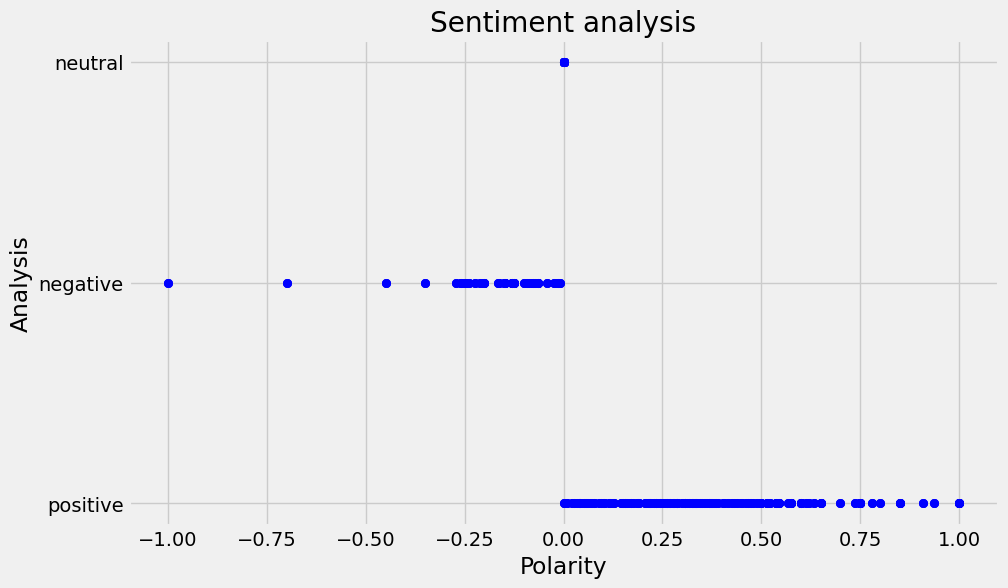

In [71]:
#plot the polarity and subjectivity
plt.figure(figsize= (10,6))
for i in range (0, tweets.shape[0]):
    plt.scatter(tweets['Polarity'][i], tweets['Analysis'][i],color='Blue')
    
plt.title('Sentiment analysis')
plt.xlabel('Polarity')
plt.ylabel('Analysis')
plt.show()


In [73]:
 # percentage of positive tweets
ptweets=tweets[tweets.Analysis == 'positive']
ptweets= ptweets['review']


round ( (ptweets.shape[0]/ tweets.shape[0]) *100, 1)

78.4

In [74]:
 # percentage of positive tweets
ptweets=tweets[tweets.Analysis == 'negative']
ptweets= ptweets['review']


round ( (ptweets.shape[0]/ tweets.shape[0]) *100, 1)

16.4

In [75]:
 # percentage of positive tweets
ptweets=tweets[tweets.Analysis == 'neutral']
ptweets= ptweets['review']


round ( (ptweets.shape[0]/ tweets.shape[0]) *100, 1)

5.2

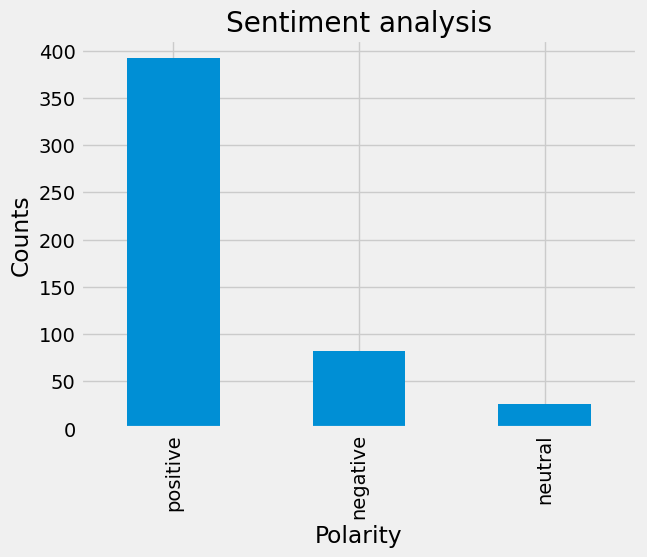

In [76]:
#value cpunts

tweets['Analysis'].value_counts()

#plot and visualize the counts
   
plt.title('Sentiment analysis')
plt.xlabel('Polarity')
plt.ylabel('Counts')
tweets['Analysis'].value_counts().plot(kind='bar')
plt.show()